In [1]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt

proj_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if proj_root not in sys.path:
	sys.path.insert(0, proj_root)

from src.data.datasets import load_features
from src.strategies.sma_cross import sma_crossover_signals
from src.backtest.engine import run_backtest_long_only

os.chdir("../../")  # agora você deve estar em .../quant_lab
print(os.getcwd())

c:\Users\luisr\OneDrive\Documentos\quant_lab


In [2]:
df = load_features("BTCUSDT", "1h")
df_sig = sma_crossover_signals(df, 20, 100)

res_nocost = run_backtest_long_only(df_sig, 10_000, fee_rate=0.0, slippage=0.0)
res_cost   = run_backtest_long_only(df_sig, 10_000, fee_rate=0.001, slippage=0.0002)


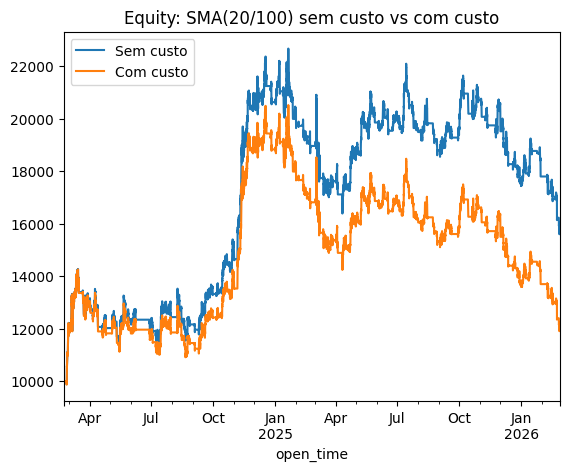

In [4]:
ax = res_nocost.equity.plot(title="Equity: SMA(20/100) sem custo vs com custo")
res_cost.equity.plot(ax=ax)
plt.legend(["Sem custo", "Com custo"])
plt.show()

In [5]:
print("Final sem custo:", res_nocost.equity.iloc[-1])
print("Final com custo:", res_cost.equity.iloc[-1])

Final sem custo: 15730.378983767854
Final com custo: 12006.240899624896


In [ ]:
equity_strategy = res_cost.equity

In [ ]:
# buy & hold: fica comprado o tempo todo a maioria não faz isso
bh_ret = df_sig["ret"].fillna(0)
equity_bh = 10_000 * (1 + bh_ret).cumprod()

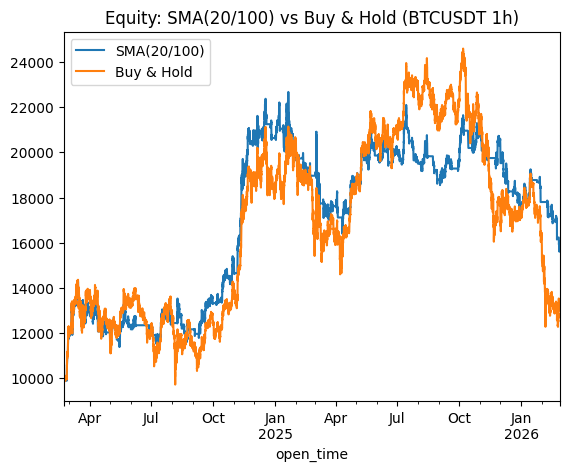

In [7]:
ax = equity_strategy.plot(title="Equity: SMA(20/100) vs Buy & Hold (BTCUSDT 1h)")
equity_bh.plot(ax=ax)
plt.legend(["SMA(20/100)", "Buy & Hold"])
plt.show()